# Xây Dựng Mạng CNN với PyTorch - Nhận Diện Chữ Số Viết Tay MNIST

## 🎯 Mục tiêu:
Trong khóa học này, bạn sẽ:
1.  Học cách xây dựng một Mạng Nơ-ron Tích chập (CNN) từ đầu bằng PyTorch.
2.  Hiểu rõ quy trình huấn luyện và đánh giá mô hình trên tập dữ liệu MNIST.
3.  Phân tích cách mô hình hoạt động bằng cách hiển thị các feature maps.
4.  Tự vẽ chữ số và để mô hình dự đoán (sử dụng `ipycanvas`).

## 🧠 Kiến thức cốt lõi:
*   PyTorch `nn.Module`, `DataLoader`, `Transforms`.
*   Kiến trúc CNN: Convolution, ReLU, MaxPooling, Fully Connected Layers.
*   Quy trình huấn luyện: Forward pass, Loss, Backward pass, Optimizer.
*   Trực quan hóa dữ liệu và kết quả mô hình.
*   Tương tác người dùng trong Jupyter Notebook.

## PHẦN 1: ĐỊNH NGHĨA KIẾN TRÚC MÔ HÌNH CNN

### Mục đích:
Tạo lớp mô hình kế thừa từ `nn.Module` để định nghĩa mạng CNN.

### Kiến trúc Mô hình `ScaledUpDigitClassifierCNN`:
1.  **Conv Block 1:**
    *   `Conv1 (1->64) + BatchNorm + ReLU`
    *   `Conv2 (64->64) + BatchNorm + ReLU`
    *   `MaxPool2D` (28x28 -> 14x14)
    *   `Dropout2D`
2.  **Conv Block 2:**
    *   `Conv3 (64->128) + BatchNorm + ReLU`
    *   `Conv4 (128->128) + BatchNorm + ReLU`
    *   `MaxPool2D` (14x14 -> 7x7)
    *   `Dropout2D`
3.  **Fully Connected Layers:**
    *   `Flatten` (128 * 7 * 7 = 6272)
    *   `FC1 (6272->512) + BatchNorm + ReLU + Dropout`
    *   `FC2 (512->256) + BatchNorm + ReLU + Dropout`
    *   `FC3 (256->10)` (Output logits)

In [1]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Xác định thiết bị tính toán
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Sử dụng thiết bị: {device}")

[INFO] Sử dụng thiết bị: cuda


In [4]:
class ScaledUpDigitClassifierCNN(nn.Module):
    """
    Mạng CNN được với nhiều lớp và neuron.
    """
    def __init__(self):
        super(ScaledUpDigitClassifierCNN, self).__init__()
        # Conv Layer 1: Nhận ảnh xám (1 channel), tạo 64 feature maps.
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=64)

        # Conv Layer 2: 64 input -> 64 output feature maps.
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=64)

        # Conv Layer 3: 64 input -> 128 output feature maps.
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=128)

        # Conv Layer 4: 128 input -> 128 output feature maps.
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(num_features=128)

        # Dropout cho phần tích chập để tránh overfitting.
        self.dropout_conv = nn.Dropout2d(p=0.25)

        # Sau 2 lần MaxPool2d, kích thước ảnh là 7x7.
        # Tổng số feature: 128 * 7 * 7 = 6272
        self.fc1 = nn.Linear(in_features=128 * 7 * 7, out_features=512)
        self.bn_fc1 = nn.BatchNorm1d(num_features=512)
        self.dropout_fc1 = nn.Dropout(p=0.5)

        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.bn_fc2 = nn.BatchNorm1d(num_features=256)
        self.dropout_fc2 = nn.Dropout(p=0.5)

        # Lớp output cuối cùng: 10 units cho 10 lớp chữ số (0-9).
        self.fc3 = nn.Linear(in_features=256, out_features=10)

    def forward(self, x):
        """
        Định nghĩa cách dữ liệu đi qua mạng (forward pass).
        """
        # Conv1 -> BatchNorm -> ReLU
        x = F.relu(self.bn1(self.conv1(x)))
        # Conv2 -> BatchNorm -> ReLU
        x = F.relu(self.bn2(self.conv2(x)))
        # Max Pooling: Giảm kích thước không gian xuống 1 nửa (28x28 -> 14x14).
        x = F.max_pool2d(input=x, kernel_size=2)
        # Dropout để tránh overfitting.
        x = self.dropout_conv(x)

        # Conv3 -> BatchNorm -> ReLU
        x = F.relu(self.bn3(self.conv3(x)))
        # Conv4 -> BatchNorm -> ReLU
        x = F.relu(self.bn4(self.conv4(x)))
        # Max Pooling: (14x14 -> 7x7).
        x = F.max_pool2d(input=x, kernel_size=2)
        # Dropout.
        x = self.dropout_conv(x)

        # Flatten tensor từ 4D (batch, channel, height, width) về 2D (batch, features).
        x = torch.flatten(input=x, start_dim=1)

        # FC1 -> BatchNorm -> ReLU -> Dropout
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout_fc1(x)

        # FC2 -> BatchNorm -> ReLU -> Dropout
        x = F.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout_fc2(x)

        # Lớp output cuối cùng. Trả về logits (raw scores).
        x = self.fc3(x)

        return x

## PHẦN 2: CHUẨN BỊ DỮ LIỆU

### Mục đích:
Tải và tiền xử lý bộ dữ liệu MNIST để sẵn sàng cho huấn luyện.

In [5]:
!pip install torchvision

In [6]:
from torchvision import datasets, transforms

### Các bước:
1.  **Transforms:** Chuẩn hóa và chuyển đổi dữ liệu.
    *   `ToTensor()`: Chuyển ảnh PIL thành `torch.Tensor` và scale pixel về [0, 1].
    *   `Normalize(mean, std)`: Chuẩn hóa theo thống kê của MNIST. Điều này rất quan trọng để mô hình học hiệu quả.
2.  **Datasets:** Tải dữ liệu huấn luyện và kiểm tra từ `torchvision.datasets`.
3.  **DataLoader:** Gói dữ liệu thành các `batch` để huấn luyện hiệu quả.

In [7]:
# `transforms.Compose` kết hợp nhiều phép biến đổi lại.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

# Tải Dữ liệu
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Tạo DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

print(f"[INFO] Đã tải xong dữ liệu.")
print(f"  - Số lượng mẫu huấn luyện: {len(train_dataset)}")
print(f"  - Số lượng mẫu kiểm tra: {len(test_dataset)}")
print(f"  - Kích thước batch: {train_loader.batch_size}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.96MB/s]


[INFO] Đã tải xong dữ liệu.
  - Số lượng mẫu huấn luyện: 60000
  - Số lượng mẫu kiểm tra: 10000
  - Kích thước batch: 64


## PHẦN 3: KHỞI TẠO MÔ HÌNH, TỐI ƯU HÓA VÀ HÀM MẤT MÁT

### Mục đích:
Tạo một instance của mô hình, chọn thuật toán tối ưu và hàm đánh giá hiệu suất.

In [8]:
import torch.optim as optim

### Các thành phần:
1.  **Mô hình (`model`)**: Instance của `ScaledUpDigitClassifierCNN`.
2.  **Tối ưu hóa (`optimizer`)**: `Adam` là một optimizer phổ biến, hiệu quả và dễ dùng.
3.  **Hàm mất mát (`criterion`)**: `CrossEntropyLoss` phù hợp cho bài toán phân loại nhiều lớp với output là logits.

In [9]:
model = ScaledUpDigitClassifierCNN().to(device)
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(f"[INFO] Mô hình, optimizer và loss function đã sẵn sàng.")
print(f"  - Tổng số tham số của mô hình: {sum(p.numel() for p in model.parameters()):,}")

[INFO] Mô hình, optimizer và loss function đã sẵn sàng.
  - Tổng số tham số của mô hình: 3,606,986


## PHẦN 4: HÀM HUẤN LUYỆN (TRAINING LOOP)

### Mục đích:
Thực hiện một vòng lặp (epoch) để huấn luyện mô hình trên dữ liệu.

### Quy trình trong một epoch:
1.  **Đặt mô hình về chế độ huấn luyện** (`model.train()`).
2.  **Lặp qua từng batch dữ liệu** từ `train_loader`.
3.  **Zero Gradients**: Xóa gradient tích lũy từ lần trước.
4.  **Forward Pass**: Đưa dữ liệu qua mô hình để nhận dự đoán (logits).
5.  **Tính Loss**: So sánh dự đoán với nhãn thật.
6.  **Backward Pass**: Tính gradient của loss theo tất cả các tham số.
7.  **Optimizer Step**: Cập nhật các tham số theo gradient.
8.  **In tiến trình**: Hiển thị loss định kỳ.

In [10]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} '
                  f'[{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\t'
                  f'Loss: {loss.item():.6f}')

## PHẦN 5: HÀM KIỂM TRA (EVALUATION LOOP)

### Mục đích:
Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra sau mỗi epoch.

### Quy trình:
1.  **Đặt mô hình về chế độ đánh giá** (`model.eval()`).
2.  **Tắt tính toán gradient** (`torch.no_grad()`).
3.  **Lặp qua từng batch** trong `test_loader`.
4.  **Forward Pass**: Nhận dự đoán.
5.  **Tính Loss**: Tổng hợp loss trung bình.
6.  **Tính Độ chính xác**: So sánh dự đoán với nhãn thật.
7.  **Trả về độ chính xác** để lưu mô hình tốt nhất.

In [11]:
def test(model, device, test_loader):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')

    return accuracy

## PHẦN 6: HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH

### Mục đích:
Thực hiện toàn bộ quá trình huấn luyện qua nhiều epoch và lưu lại mô hình tốt nhất.

### Quy trình:
1.  **Xác định số lượng epoch.**
2.  **Khởi tạo biến `best_accuracy`.**
3.  **Lặp qua từng epoch:**
    *   Gọi `train()` để huấn luyện.
    *   Gọi `test()` để đánh giá.
    *   So sánh độ chính xác mới với `best_accuracy`.
    *   Nếu tốt hơn, lưu mô hình (`torch.save`).
4.  **Kết thúc và thông báo.**

In [12]:
num_epochs = 5
best_accuracy = 0.0

print(f"[INFO] Bắt đầu huấn luyện trong {num_epochs} epochs...")

for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    accuracy = test(model, device, test_loader)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), "best_digit_classifier.pth")
        print(f"[INFO] Độ chính xác mới cao nhất: {best_accuracy:.2f}%. Đã lưu mô hình.")

print("[INFO] ✅ Quá trình huấn luyện đã hoàn tất!")

[INFO] Bắt đầu huấn luyện trong 5 epochs...
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.428702
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.069395
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.105902
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.079707
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.096613
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.068019
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.026366
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.099481
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.033545
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.108306

Test set: Average loss: 0.0000, Accuracy: 9891/10000 (98.91%)

[INFO] Độ chính xác mới cao nhất: 98.91%. Đã lưu mô hình.
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.067691
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.005592
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.017525
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.015970
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.026549
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.029512
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.056

## PHẦN 7: MÔ HÌNH PHỤ TRỢ ĐỂ PHÂN TÍCH FEATURE MAPS

### Mục đích:
Tạo một phiên bản đặc biệt của mô hình để có thể trích xuất các feature maps trung gian trong quá trình forward pass. Điều này giúp chúng ta "nhìn thấy" những gì mô hình học được.

### Cách làm:
1.  Tạo lớp `AnalysisNet` kế thừa `nn.Module`.
2.  Sao chép các lớp từ mô hình gốc.
3.  Ghi đè phương thức `forward` để lưu lại các tensor trung gian (`conv1_out`, `conv2_out`).

In [13]:
class AnalysisNet(nn.Module):
    """
    Mô hình phụ trợ để lấy feature maps trung gian từ mô hình đã huấn luyện.
    """
    def __init__(self, original_model):
        super(AnalysisNet, self).__init__()
        # Sao chép tất cả các lớp từ mô hình gốc (ScaledUpDigitClassifierCNN)
        # Conv Block 1
        self.conv1 = original_model.conv1
        self.bn1 = original_model.bn1
        self.conv2 = original_model.conv2
        self.bn2 = original_model.bn2

        # Conv Block 2
        self.conv3 = original_model.conv3
        self.bn3 = original_model.bn3
        self.conv4 = original_model.conv4
        self.bn4 = original_model.bn4

        # Các lớp khác
        self.dropout_conv = original_model.dropout_conv
        self.fc1 = original_model.fc1
        self.bn_fc1 = original_model.bn_fc1
        self.dropout_fc1 = original_model.dropout_fc1
        self.fc2 = original_model.fc2
        self.bn_fc2 = original_model.bn_fc2
        self.dropout_fc2 = original_model.dropout_fc2
        self.fc3 = original_model.fc3

    def forward(self, x):
        """
        Forward pass với việc lưu lại feature maps trung gian.
        """
        # Conv Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        conv1_out = x # Lưu feature maps sau block 1
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout_conv(x)

        # Conv Block 2
        x = F.relu(self.bn3(self.conv3(x)))
        conv2_out = x # Lưu feature maps sau block 2
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout_conv(x)

        # Fully Connected Layers
        x = torch.flatten(x, 1)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout_fc1(x)
        x = F.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout_fc2(x)
        final_out = self.fc3(x) # Logits cuối cùng

        # Trả về output và các feature map trung gian
        return final_out, conv1_out, conv2_out

print("[INFO] ✅ Đã định nghĩa AnalysisNet.")

[INFO] ✅ Đã định nghĩa AnalysisNet.


## PHẦN 8: HÀM PHÂN TÍCH VÀ DỰ ĐOÁN

### Mục đích:
Sử dụng `AnalysisNet` để phân tích một hình ảnh đầu vào và hiển thị trực quan cách mô hình xử lý nó.

### Các bước:
1.  Tạo instance của `AnalysisNet`.
2.  Thực hiện forward pass và nhận logits + feature maps.
3.  Tính toán dự đoán cuối cùng.
4.  Sử dụng `matplotlib` để vẽ:
    *   Hình ảnh đầu vào.
    *   16 feature maps đầu tiên từ `Conv1`.
    *   16 feature maps đầu tiên từ `Conv2`.

In [14]:
!pip install matplotlib

In [15]:
import matplotlib.pyplot as plt

In [16]:
def analyze_and_predict(original_model, device, image_tensor, true_label=None):
    """
    Phân tích và dự đoán một hình ảnh, hiển thị feature maps.

    Args:
        original_model: Mô hình đã được huấn luyện.
        device: Thiết bị tính toán.
        image_tensor: Tensor hình ảnh đầu vào (batch_size=1, 1, 28, 28).
        true_label: Nhãn thật (nếu có) để hiển thị.
    """
    print("[INFO] Bắt đầu phân tích hình ảnh...")

    # --- Tạo mô hình phân tích ---
    analysis_model = AnalysisNet(original_model).to(device)
    analysis_model.eval() # Đặt về chế độ đánh giá

    with torch.no_grad(): # Tắt gradient
        image_tensor = image_tensor.to(device)
        # Forward pass và nhận output + feature maps
        logits, conv1_features, conv2_features = analysis_model(image_tensor)

        # --- 1. Tính toán dự đoán cuối cùng ---
        probabilities = F.softmax(logits, dim=1) # Chuyển logits thành xác suất
        predicted_class = logits.argmax(dim=1).item() # Lớp có xác suất cao nhất
        confidence = probabilities[0][predicted_class].item() # Độ tin cậy

        # --- 2. Trực quan hóa kết quả ---
        # Tạo figure lớn để chứa nhiều hình ảnh
        fig = plt.figure(figsize=(20, 12))

        # a. Hình ảnh đầu vào (chiếm 2 cột)
        ax_input = plt.subplot2grid((4, 10), (0, 0), rowspan=2, colspan=2)
        img_to_show = image_tensor.cpu().squeeze()
        # "Unnormalize" để hiển thị hình ảnh tự nhiên hơn
        img_to_show = img_to_show * 0.3081 + 0.1307
        ax_input.imshow(img_to_show, cmap='gray')
        title = f'Dự đoán: {predicted_class}\n(Độ tin cậy: {confidence:.2f})'
        if true_label is not None:
            title += f'\nNhãn thật: {true_label}'
        ax_input.set_title(title, fontsize=12)
        ax_input.axis('off')

        # b. 16 Feature maps đầu tiên của Conv1
        conv1_cpu = conv1_features.cpu().squeeze()
        for i in range(16):
            row = i // 4
            col = 2 + (i % 4)
            ax = plt.subplot2grid((4, 10), (row, col))
            ax.imshow(conv1_cpu[i], cmap='viridis')
            ax.set_title(f'Conv1_{i}', fontsize=9)
            ax.axis('off')

        # c. 16 Feature maps đầu tiên của Conv2
        conv2_cpu = conv2_features.cpu().squeeze()
        for i in range(16):
            row = 2 + (i // 8) # Hàng 2 hoặc 3
            col = i % 8        # Cột 0-7
            ax = plt.subplot2grid((4, 10), (row, col))
            ax.imshow(conv2_cpu[i], cmap='viridis')
            ax.set_title(f'Conv2_{i}', fontsize=9)
            ax.axis('off')

        plt.tight_layout(pad=1.0)
        plt.show()

        # --- 3. In kết quả phân tích bằng text ---
        print(f"\n[KẾT QUẢ DỰ ĐOÁN]")
        print(f"  - Dự đoán cuối cùng: Chữ số {predicted_class}")
        print(f"  - Độ tin cậy: {confidence:.4f}")

        # THÊM BẢNG XÁC SUẤT CHO TẤT CẢ 10 CHỮ SỐ
        print("\n[XÁC SUẤT CHO TỪNG CHỮ SỐ]")
        for i in range(10):
            prob = probabilities[0][i].item()
            print(f"  - Chữ số {i}: {prob:.4f} ({prob*100:.2f}%)")

        if true_label is not None:
            print(f"\n[NHÃN THẬT] {true_label}")
        print("-" * 40)

    return predicted_class, confidence

print("[INFO] ✅ Đã định nghĩa hàm analyze_and_predict.")

[INFO] ✅ Đã định nghĩa hàm analyze_and_predict.


## PHẦN 9: VÍ DỤ PHÂN TÍCH HÌNH ẢNH TỪ TẬP TEST

### Mục đích:
Tải lại mô hình tốt nhất đã lưu và phân tích một hình ảnh ngẫu nhiên từ tập test.

### Các bước:
1.  Tải lại `state_dict` của mô hình từ file `best_digit_classifier.pth`.
2.  Lấy một batch dữ liệu từ `test_loader`.
3.  Chọn một hình ảnh và nhãn thật.
4.  Gọi `analyze_and_predict` để thực hiện phân tích.

[INFO] Đang tải mô hình tốt nhất đã lưu...
[INFO] ✅ Đã tải xong mô hình tốt nhất.

[INFO] Bắt đầu phân tích hình ảnh có nhãn thật là: 7
[INFO] Bắt đầu phân tích hình ảnh...


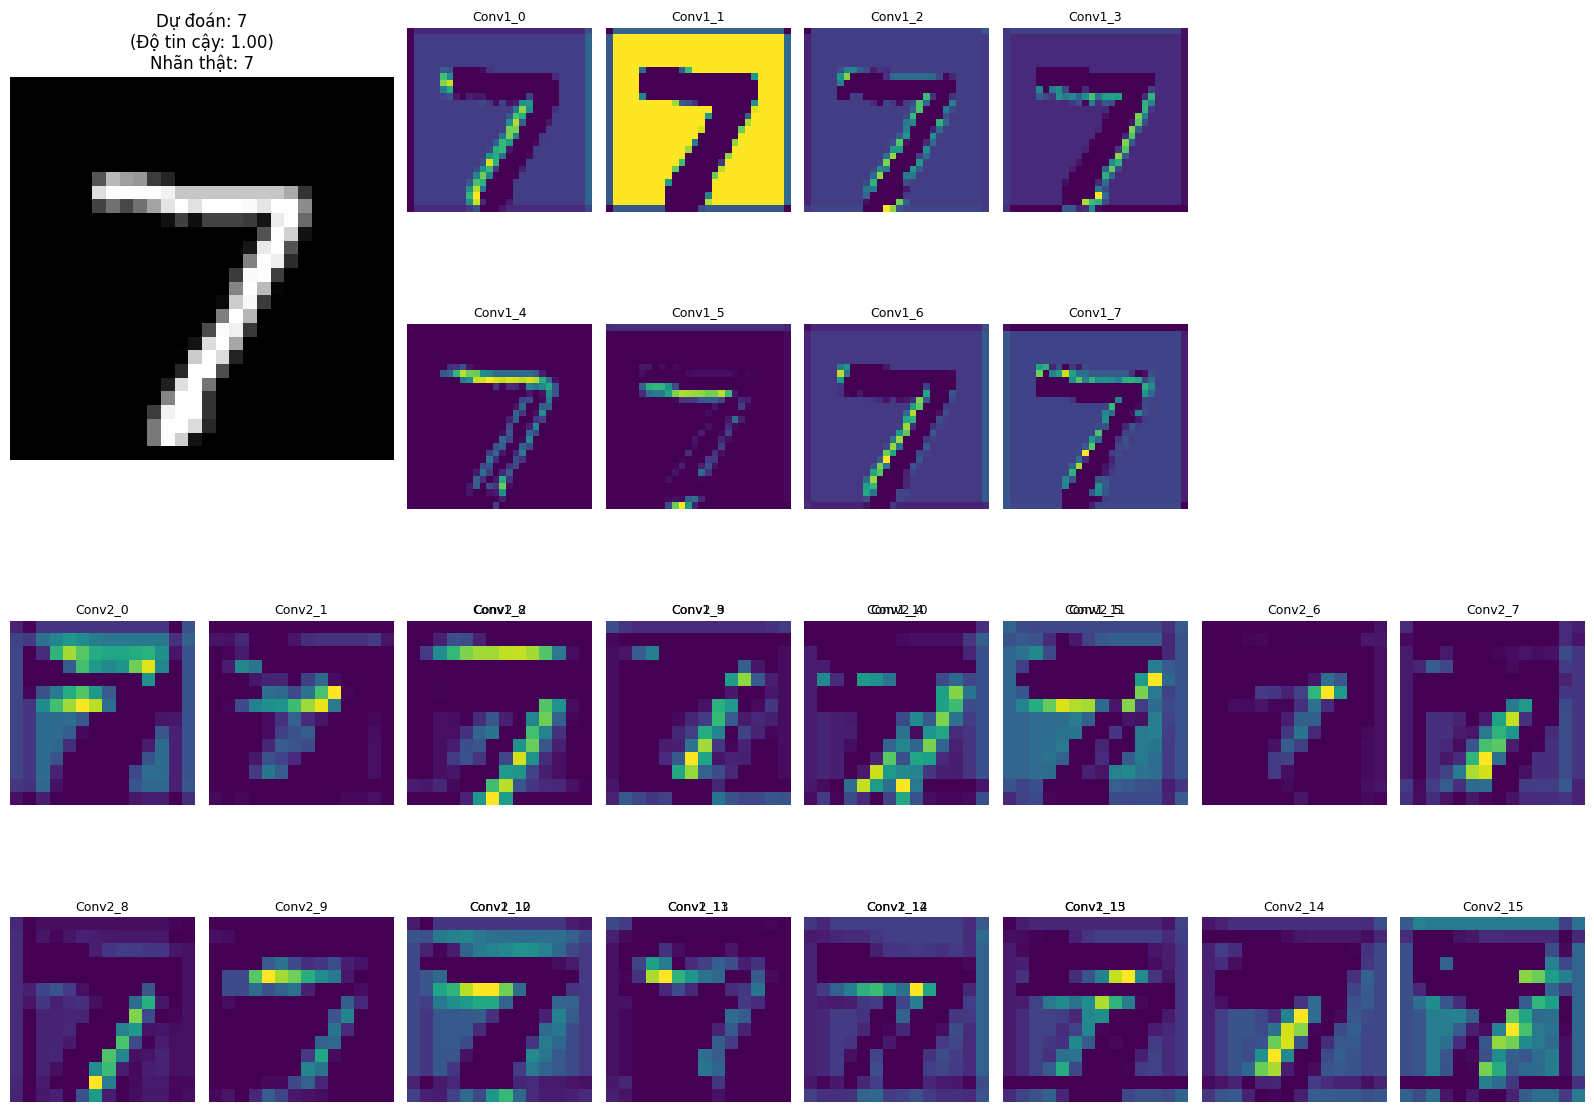


[KẾT QUẢ DỰ ĐOÁN]
  - Dự đoán cuối cùng: Chữ số 7
  - Độ tin cậy: 1.0000

[XÁC SUẤT CHO TỪNG CHỮ SỐ]
  - Chữ số 0: 0.0000 (0.00%)
  - Chữ số 1: 0.0000 (0.00%)
  - Chữ số 2: 0.0000 (0.00%)
  - Chữ số 3: 0.0000 (0.00%)
  - Chữ số 4: 0.0000 (0.00%)
  - Chữ số 5: 0.0000 (0.00%)
  - Chữ số 6: 0.0000 (0.00%)
  - Chữ số 7: 1.0000 (100.00%)
  - Chữ số 8: 0.0000 (0.00%)
  - Chữ số 9: 0.0000 (0.00%)

[NHÃN THẬT] 7
----------------------------------------


In [17]:
print("[INFO] Đang tải mô hình tốt nhất đã lưu...")
try:
    model.load_state_dict(torch.load("best_digit_classifier.pth", weights_only=True))
    model.to(device)
    print("[INFO] ✅ Đã tải xong mô hình tốt nhất.")
except FileNotFoundError:
    print("[LỖI] Không tìm thấy file 'best_digit_classifier.pth'.")
    print("      Đảm bảo bạn đã chạy phần huấn luyện (Ô 16).")
except Exception as e:
    print(f"[LỖI] {e}")
    print("      Đang thử tải mà không dùng weights_only...")
    try:
        model.load_state_dict(torch.load("best_digit_classifier.pth"))
        model.to(device)
        print("[INFO] ✅ Đã tải xong mô hình (không dùng weights_only).")
    except Exception as e2:
        print(f"[LỖI] Không thể tải mô hình: {e2}")

try:
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    img_to_analyze = images[0:1]
    true_label = labels[0].item()

    print(f"\n[INFO] Bắt đầu phân tích hình ảnh có nhãn thật là: {true_label}")
    _ = analyze_and_predict(model, device, img_to_analyze, true_label=true_label)

except Exception as e:
    print(f"[LỖI] Lỗi khi phân tích hình ảnh từ tập test: {e}")

## PHẦN 10: VẼ VÀ PHÂN TÍCH HÌNH ẢNH TỰ VẼ

### Mục đích:
Tạo một giao diện tương tác trong Jupyter Notebook để người dùng tự vẽ chữ số và để mô hình dự đoán.

### Các thành phần:
1.  **Canvas (`ipycanvas.Canvas`)**: Khu vực vẽ.

In [18]:
!pip install ipycanvas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.7 MB/s eta 0:00:00


In [19]:
from ipycanvas import Canvas
import numpy as np

In [20]:
print("[INFO] Đang kiểm tra trạng thái mô hình...")
model_loaded = True
if not model_loaded:
    print("[CẢNH BÁO] Mô hình có thể chưa được tải. Chức năng vẽ có thể không hoạt động.")

# Khởi tạo canvas ipycanvas
canvas_size = 280
canvas = Canvas(width=canvas_size, height=canvas_size)
canvas.stroke_style = 'black'
canvas.line_width = 15
canvas.fill_style = 'black'

# Ma trận numpy để lưu hình ảnh 28x28 sẽ đưa vào mô hình
drawing_array = np.zeros((28, 28), dtype=np.float32)

# Biến trạng thái
is_drawing = False
has_drawn = False

print("[INFO] ✅ Canvas ipycanvas đã được khởi tạo.")

[INFO] Đang kiểm tra trạng thái mô hình...
[INFO] ✅ Canvas ipycanvas đã được khởi tạo.


2.  **Hàm xử lý sự kiện chuột**: Cập nhật ma trận `drawing_array`.

In [21]:
!pip install ipywidgets

In [22]:
from ipycanvas import hold_canvas

In [23]:
def on_mouse_down(x, y):
    """Xử lý khi nhấn chuột xuống."""
    global is_drawing, has_drawn
    is_drawing = True
    has_drawn = True
    update_button_state_ipy() # Cập nhật trạng thái nút
    draw_point(x, y) # Vẽ điểm đầu tiên

def on_mouse_move(x, y):
    """Xử lý khi di chuyển chuột (khi đang nhấn)."""
    if is_drawing:
        draw_point(x, y)

def on_mouse_up(x, y):
    """Xử lý khi nhả chuột."""
    global is_drawing
    is_drawing = False

def draw_point(x, y):
    """
    Vẽ một điểm mềm mại lên canvas và cập nhật drawing_array.
    """
    # 1. Vẽ lên canvas ipycanvas (kích thước 280x280)
    with hold_canvas(canvas):
        canvas.fill_circle(x, y, canvas.line_width / 2)

    # 2. Cập nhật drawing_array (kích thước 28x28) một cách mềm mại hơn
    # Scale tọa độ từ canvas (0-280) về ma trận (0-27)
    grid_x_float = x / canvas_size * 28.0
    grid_y_float = y / canvas_size * 28.0
    grid_x = int(grid_x_float)
    grid_y = int(grid_y_float)

    if 0 <= grid_x < 28 and 0 <= grid_y < 28:
        # Tính offset để phân bố pixel tốt hơn (sub-pixel rendering đơn giản)
        dx = grid_x_float - grid_x
        dy = grid_y_float - grid_y

        # Vẽ một khu vực 2x2 xung quanh điểm chính để làm mượt
        for dy_offset in [0, 1]:
            for dx_offset in [0, 1]:
                nx = grid_x + dx_offset
                ny = grid_y + dy_offset
                if 0 <= nx < 28 and 0 <= ny < 28:
                    # Tính trọng số dựa trên khoảng cách
                    weight_x = 1.0 - abs((dx_offset - dx))
                    weight_y = 1.0 - abs((dy_offset - dy))
                    weight = weight_x * weight_y
                    # Cập nhật pixel với giá trị có trọng số (giữ giá trị max)
                    drawing_array[ny, nx] = np.maximum(drawing_array[ny, nx], weight)

# Gắn kết sự kiện chuột với canvas
canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)

print("[INFO] ✅ Hàm xử lý vẽ cho ipycanvas đã được kết nối.")

[INFO] ✅ Hàm xử lý vẽ cho ipycanvas đã được kết nối.


3.  **Nút (`ipywidgets.Button`)**: "Predict" và "Clear".
4.  **Khu vực output (`ipywidgets.Output`)**: Hiển thị kết quả.

In [24]:
import ipywidgets as widgets
from IPython.display import clear_output

In [25]:
def predict_from_array(model, device, np_image_array):
    """
    Dự đoán từ một mảng numpy 28x28.
    """
    tensor_image = torch.from_numpy(np_image_array).float()
    tensor_image = tensor_image.unsqueeze(0).unsqueeze(0) # Thêm batch_dim và channel_dim
    normalized_tensor = (tensor_image - 0.1307) / 0.3081 # Normalize giống MNIST
    model.eval()
    with torch.no_grad():
        normalized_tensor = normalized_tensor.to(device)
        output = model(normalized_tensor)
        probabilities = F.softmax(output, dim=1)
        predicted_class = output.argmax(dim=1).item()
        confidence = probabilities[0][predicted_class].item()

        # TRẢ VỀ XÁC SUẤT CHO TẤT CẢ 10 LỚP
        all_probabilities = probabilities[0].cpu().numpy()

    return predicted_class, confidence, all_probabilities

def on_predict_button_clicked_ipy(b):
    """Xử lý khi nhấn nút Predict với cấu trúc in chi tiết như phần test."""
    if not model_loaded:
        with output_area:
            clear_output(wait=True)
            print("❌ Lỗi: Mô hình chưa được tải. Không thể dự đoán.")
        return

    if not has_drawn or np.all(drawing_array == 0):
        with output_area:
            clear_output(wait=True)
            print("⚠️ Vui lòng vẽ một chữ số trước khi nhấn 'Predict'.")
        return

    with output_area: # Hiển thị trong khu vực output đã chỉ định
        clear_output(wait=True)
        print("🔍 Đang phân tích hình vẽ...")

        try:
            # CHUẨN BỊ DỮ LIỆU
            # Chuyển numpy array thành tensor PyTorch
            img_to_predict = drawing_array.copy()
            tensor_image = torch.from_numpy(img_to_predict).float()
            tensor_image = tensor_image.unsqueeze(0).unsqueeze(0)  # (1, 1, 28, 28)
            normalized_tensor = (tensor_image - 0.1307) / 0.3081

            # TẠO MÔ HÌNH PHÂN TÍCH
            analysis_model = AnalysisNet(model).to(device)
            analysis_model.eval()

            with torch.no_grad():
                normalized_tensor = normalized_tensor.to(device)
                # Forward pass và nhận output + feature maps
                logits, conv1_features, conv2_features = analysis_model(normalized_tensor)

                # 1. TÍNH TOÁN DỰ ĐOÁN
                probabilities = F.softmax(logits, dim=1)
                predicted_class = logits.argmax(dim=1).item()
                confidence = probabilities[0][predicted_class].item()
                all_probabilities = probabilities[0].cpu().numpy()  # Xác suất cho tất cả 10 chữ số

                # 2. TRỰC QUAN HÓA KẾT QUẢ
                # Tạo figure lớn để chứa nhiều hình ảnh
                fig = plt.figure(figsize=(20, 12))

                # a. Hình ảnh đầu vào (chiếm 2 cột)
                ax_input = plt.subplot2grid((4, 10), (0, 0), rowspan=2, colspan=2)
                img_to_show = normalized_tensor.cpu().squeeze()
                # "Unnormalize" để hiển thị hình ảnh tự nhiên hơn
                img_to_show = img_to_show * 0.3081 + 0.1307
                ax_input.imshow(img_to_show, cmap='gray')
                title = f'Dự đoán: {predicted_class}\n(Độ tin cậy: {confidence:.2f})'
                ax_input.set_title(title, fontsize=12)
                ax_input.axis('off')

                # b. 16 Feature maps đầu tiên của Conv1
                conv1_cpu = conv1_features.cpu().squeeze()
                for i in range(16):
                    row = i // 4
                    col = 2 + (i % 4)
                    ax = plt.subplot2grid((4, 10), (row, col))
                    ax.imshow(conv1_cpu[i], cmap='viridis')
                    ax.set_title(f'Conv1_{i}', fontsize=9)
                    ax.axis('off')

                # c. 16 Feature maps đầu tiên của Conv2
                conv2_cpu = conv2_features.cpu().squeeze()
                for i in range(16):
                    row = 2 + (i // 8)  # Hàng 2 hoặc 3
                    col = i % 8         # Cột 0-7
                    ax = plt.subplot2grid((4, 10), (row, col))
                    ax.imshow(conv2_cpu[i], cmap='viridis')
                    ax.set_title(f'Conv2_{i}', fontsize=9)
                    ax.axis('off')

                plt.tight_layout(pad=1.0)
                plt.show()

                # 3. IN KẾT QUẢ PHÂN TÍCH CHI TIẾT
                print(f"\n[PHÂN TÍCH MÔ HÌNH]")
                print(f"  - Lớp Conv1 (64 feature maps) trích xuất các đặc trưng cơ bản như cạnh, góc.")
                print(f"  - Lớp Conv2 (128 feature maps) kết hợp các đặc trưng cơ bản để tạo ra các mẫu phức tạp hơn.")
                print(f"  - Cuối cùng, các feature maps được flatten và đưa vào lớp Fully Connected để dự đoán.")

                print(f"\n[KẾT QUẢ DỰ ĐOÁN CHI TIẾT]")
                print(f"  - Dự đoán cuối cùng: Chữ số {predicted_class}")
                print(f"  - Độ tin cậy: {confidence:.4f} ({confidence*100:.2f}%)")

                # HIỂN THỊ XÁC SUẤT CHO TẤT CẢ 10 CHỮ SỐ
                print(f"\n[XÁC SUẤT CHO TỪNG CHỮ SỐ (0-9)]")
                for i in range(10):
                    prob = all_probabilities[i]
                    print(f"  - Chữ số {i}: {prob:.4f} ({prob*100:.2f}%)")

                # BIỂU ĐỒ CỘT CHO DỄ NHÌN
                print(f"\n[BIỂU ĐỒ XÁC SUẤT]")
                fig_prob, ax_prob = plt.subplots(figsize=(10, 3))
                digits = list(range(10))
                colors = ['blue' if i != predicted_class else 'red' for i in digits]
                ax_prob.bar(digits, all_probabilities, color=colors)
                ax_prob.set_xlabel('Chữ số', fontsize=10)
                ax_prob.set_ylabel('Xác suất', fontsize=10)
                ax_prob.set_title('Xác suất dự đoán cho từng chữ số', fontsize=12)
                ax_prob.set_xticks(digits)
                ax_prob.set_ylim(0, 1)

                # Hiển thị giá trị trên cột
                for i, v in enumerate(all_probabilities):
                    ax_prob.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

                plt.tight_layout()
                plt.show()

                print("-" * 40)

        except Exception as e:
            print(f"❌ Lỗi trong quá trình dự đoán: {e}")

def on_clear_button_clicked_ipy(b):
    """Xử lý khi nhấn nút Clear."""
    global drawing_array, has_drawn
    drawing_array = np.zeros((28, 28), dtype=np.float32)
    has_drawn = False
    update_button_state_ipy() # Cập nhật nút
    canvas.clear() # Xóa canvas
    with output_area:
        clear_output(wait=True)
        print("🗑️ Canvas đã được xóa.")

def update_button_state_ipy():
    """Cập nhật trạng thái kích hoạt của nút Predict."""
    if has_drawn and not np.all(drawing_array == 0):
        predict_button_ipy.disabled = False
        predict_button_ipy.button_style = 'success' # Nút xanh
    else:
        predict_button_ipy.disabled = True
        predict_button_ipy.button_style = '' # Nút mặc định

# Tạo các nút
predict_button_ipy = widgets.Button(
    description="Predict",
    disabled=True, # Ban đầu bị tắt
    button_style='', # 'success', 'info', 'warning', 'danger' hoặc ''
    tooltip='Dự đoán chữ số đã vẽ'
)
clear_button_ipy = widgets.Button(
    description="Clear Canvas",
    button_style='warning', # Nút màu cam
    tooltip='Xóa toàn bộ canvas'
)

# Gắn hàm xử lý cho nút
predict_button_ipy.on_click(on_predict_button_clicked_ipy)
clear_button_ipy.on_click(on_clear_button_clicked_ipy)

# Tạo khu vực hiển thị output
output_area = widgets.Output(layout=widgets.Layout(height='2000px', border='1px solid black'))

print("[INFO] ✅ Nút và hàm xử lý cho ipycanvas đã được tạo.")

[INFO] ✅ Nút và hàm xử lý cho ipycanvas đã được tạo.


In [26]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
except ImportError:
  pass

In [27]:
# Hiển thị tất cả các thành phần
display(widgets.HTML("<h3>🎨 Vẽ Chữ Số của Bạn (ipycanvas)</h3>"))
display(widgets.HTML("<p><i>Vẽ bằng chuột trái. Nhấn 'Predict' sau khi vẽ xong.</i></p>"))
display(canvas) # Hiển thị canvas
# Thêm khoảng trống
display(widgets.HTML("<br>"))
# Hiển thị nút
display(widgets.HBox([predict_button_ipy, clear_button_ipy]))
# Thêm khoảng trống
display(widgets.HTML("<br>"))
# Hiển thị khu vực output
display(output_area)

# Gọi hàm cập nhật trạng thái ban đầu
update_button_state_ipy()

HTML(value='<h3>🎨 Vẽ Chữ Số của Bạn (ipycanvas)</h3>')

HTML(value="<p><i>Vẽ bằng chuột trái. Nhấn 'Predict' sau khi vẽ xong.</i></p>")

Canvas(height=280, width=280)

HTML(value='<br>')

HTML(value='<br>')

Output(layout=Layout(border='1px solid black', height='2000px'))